<a href="https://colab.research.google.com/github/Naman-Chawla/Business-Case-Netflix---Data-Exploration-and-Visualisation/blob/main/Netflix_Data_Exploration_Business_Case_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [ ]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv -O Netflix_data

--2023-08-06 16:18:59--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 18.164.173.58, 18.164.173.18, 18.164.173.117, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|18.164.173.58|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3399671 (3.2M) [text/plain]
Saving to: ‘Netflix_data’

Netflix_data        100%[===================>]   3.24M  --.-KB/s    in 0.06s   

2023-08-06 16:19:00 (54.4 MB/s) - ‘Netflix_data’ saved [3399671/3399671]



In [ ]:
df = pd.read_csv("Netflix_data")

### Exploring the Dataset

In [ ]:
#Shape of the Dataset
df.shape

(8807, 12)

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [ ]:
#info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


We have total 12 columns and 8807 rows\
Columns having Null values ==> director, cast, country, date_added, rating and duration\
which we are going to deal with using different methods

In [ ]:
#Info about numerical values in DataFrame
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
df.describe(include = object)

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


### **Data_Cleaning**

In [ ]:
# count of null values in each columns
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
# Replacing the missing values in director, country and cast columns
df["director"].fillna("Unknown", inplace = True)
df["country"].fillna("Unknown", inplace = True)
df["cast"].fillna("Unknown", inplace = True)

df.isna().sum()
# We are going to handle rest of the null values according to questions

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           4
duration         3
listed_in        0
description      0
dtype: int64

### Count of Categorical variables
### Non-graphical Analysis and Graphical Analysis:

In [ ]:
#types of shows netflix stream (Non-Graphical)
df["type"].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

So Netflix provide movies and TV shows, having the count of movies greater than TV shows

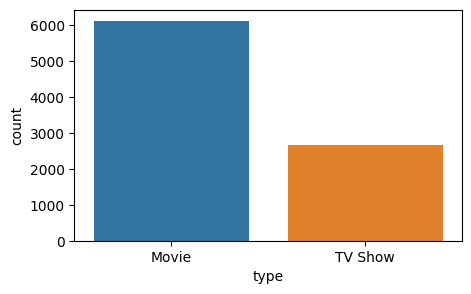

In [ ]:
##types of shows netflix stream (Graphical)
plt.figure(figsize = (5,3))
sns.countplot(data = df, x = "type")
plt.show()

Number of Movies are more than the number of TV Shows

### **Director Analysis**

In [ ]:
# Director analysis
# count of each director including the Unknow directors
Direct_1 = df["director"].str.split(", ", expand = True).stack()
Direct_1.value_counts()

Unknown           2634
Rajiv Chilaka       22
Jan Suter           21
Raúl Campos         19
Suhas Kadav         16
                  ... 
Raymie Muzquiz       1
Stu Livingston       1
Joe Menendez         1
Eric Bross           1
Mozez Singh          1
Length: 4994, dtype: int64

Around 2634 directors are unknown

In [ ]:
# Director analysis
# count of each director excluding the Unknow values
df_direc = df.loc[df["director"] != "Unknown"]
df_direc["director"] = df_direc["director"].str.split(", ")
df_direc = df_direc.explode("director").reset_index(drop = True)

top_direc_count = pd.DataFrame(df_direc.groupby(["director"])["title"].nunique()).reset_index().sort_values("title",ascending = False).head(10)
top_direc_count.columns = ['director', 'count']
top_direc_count

<ipython-input-16-c0a30d7baa85>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_direc["director"] = df_direc["director"].str.split(", ")


,director,count
3749,Rajiv Chilaka,22
1906,Jan Suter,21
3800,Raúl Campos,19
4457,Suhas Kadav,16
2866,Marcus Raboy,16
1954,Jay Karas,15
755,Cathy Garcia-Molina,13
4941,Youssef Chahine,12
1951,Jay Chapman,12
2945,Martin Scorsese,12


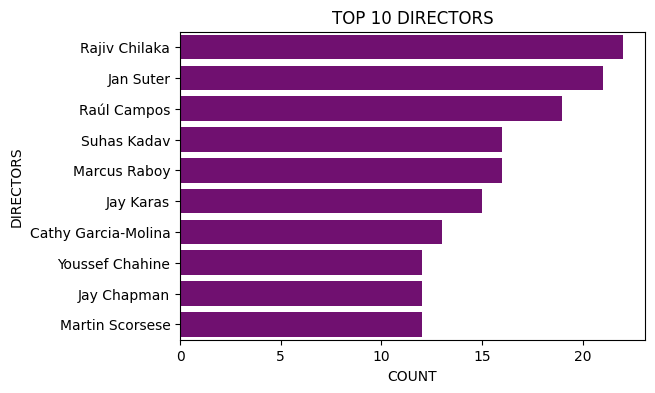

In [ ]:
# Graphical representation of Top 10 directors and the number of movies they had directed
plt.figure(figsize = (6,4))
sns.barplot(data = top_direc_count, y = "director", x = "count", color = "purple")
plt.title("TOP 10 DIRECTORS")
plt.xlabel("COUNT")
plt.ylabel("DIRECTORS")
plt.show()

Top 10 Popular Directors: Rajiv Chilaka, Jan Suter, Raúl Campos, Suhas Kadav, Marcus Raboy, Jay Karas, Cathy Garcia-Molina, Youssef Chahine, Jay chapman, Martin Scorsese

### Cast Analysis

In [ ]:
# Cast analysis
df_cast = df[df["cast"] != "Unknown"]
df_cast["cast"] = df_cast["cast"].str.split(", ")
df_cast = df_cast.explode("cast").reset_index(drop = True)

top_cast_count = pd.DataFrame(df_cast.groupby(["cast"])["title"].nunique()).reset_index().sort_values("title",ascending = False).head(10)
top_cast_count.columns = ['cast', 'count']
top_cast_count

<ipython-input-18-85f9799e0a7a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cast["cast"] = df_cast["cast"].str.split(", ")


,cast,count
2833,Anupam Kher,43
30489,Shah Rukh Khan,35
16697,Julie Tejwani,33
24215,Naseeruddin Shah,32
32591,Takahiro Sakurai,32
28974,Rupa Bhimani,31
846,Akshay Kumar,30
25424,Om Puri,30
35880,Yuki Kaji,29
1774,Amitabh Bachchan,28


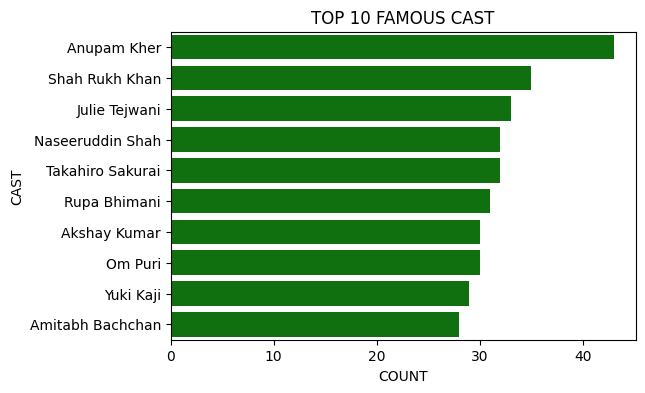

In [ ]:
# count of top 10 cast
plt.figure(figsize = (6,4))
sns.barplot(data = top_cast_count, y = "cast", x = "count", color = "green")
plt.title("TOP 10 FAMOUS CAST")
plt.xlabel("COUNT")
plt.ylabel("CAST")
plt.show()

Top 10 Popular Cast: Anupam Kher, Shah Rukh Khan, Julie Tejwani, Naseeruddin Shah, Takahiro Sakurai, Rupa Bhimani, Akshay Kumar, Om Puri, Yuki Kaji, Amitabh Bachchan

### **Country Analysis**

In [ ]:
df_new = df[df["country"] != "Unknown"]
df_new["country"] = df_new["country"].str.split(", ")
df_changed = df_new.explode("country")
df_changed.reset_index(drop = True)
df_movies = df_changed[df_changed["type"] == "Movie"]
df_shows = df_changed[df_changed["type"] == "TV Show"]

<ipython-input-20-7dcf2c4e533d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["country"] = df_new["country"].str.split(", ")


In [ ]:
# Number of movies produced in each country
movie_count = pd.DataFrame(df_movies.groupby(["country"])["title"].nunique()).reset_index().sort_values("title",ascending = False).head(10)
movie_count

,country,title
114,United States,2751
43,India,962
112,United Kingdom,532
20,Canada,319
34,France,303
36,Germany,182
100,Spain,171
51,Japan,119
23,China,114
65,Mexico,111


In [ ]:
# Number of TV Shows produced in each country
show_count = pd.DataFrame(df_shows.groupby(["country"])["title"].nunique()).reset_index().sort_values("title",ascending = False).head(10)
show_count

,country,title
63,United States,938
62,United Kingdom,272
30,Japan,199
52,South Korea,170
8,Canada,126
19,France,90
25,India,84
57,Taiwan,70
2,Australia,66
53,Spain,61


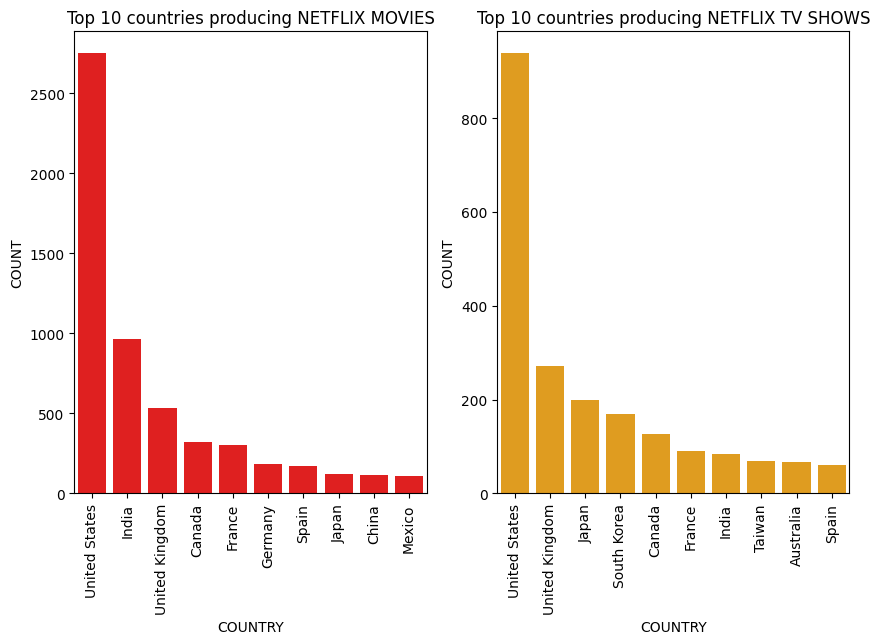

In [ ]:
# Top 10 countries producing Netflix movies
plt.figure(figsize = (10,6))
plt.subplot(1,2,1)
sns.barplot(data = movie_count, x = "country", y = "title", color = "red")
plt.title("Top 10 countries producing NETFLIX MOVIES")
plt.xlabel("COUNTRY")
plt.ylabel("COUNT")
plt.xticks(rotation = 90)

# Top 10 countries producing Netflix TV Shows
plt.subplot(1,2,2)
sns.barplot(data = show_count, x = "country", y ="title", color = "orange")
plt.title("Top 10 countries producing NETFLIX TV SHOWS")
plt.xlabel("COUNTRY")
plt.ylabel("COUNT")
plt.xticks(rotation = 90)
plt.show()

### Best launch time for TV SHOWS and MOVIES analysis
### Month wise analysis

In [ ]:
# not dealing with the null vlaues, keeping them as same:
df["date_added"] = pd.to_datetime(df["date_added"])

In [ ]:
# for movies (month-wise analysis)
df["month_name"] = df["date_added"].dt.month_name()

In [ ]:
stream_time = df.groupby(["month_name","type"])["title"].nunique().unstack()
stream_time.reset_index()

type,month_name,Movie,TV Show
0,April,550,214
1,August,519,236
2,December,547,266
3,February,382,181
4,January,546,192
5,July,565,262
6,June,492,236
7,March,529,213
8,May,439,193
9,November,498,207


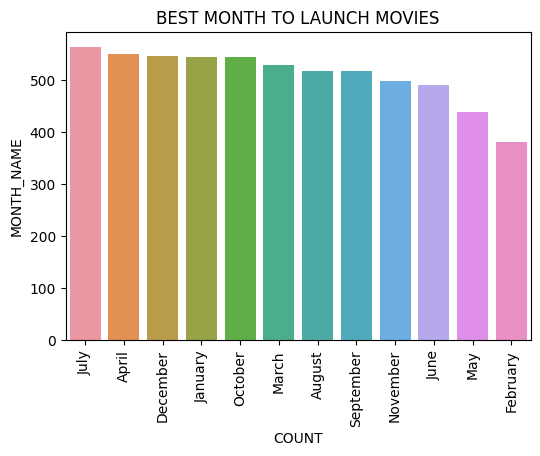

In [ ]:
movie_time = stream_time["Movie"].sort_values(ascending = False)
# subplots

plt.figure(figsize = (6,4))
sns.barplot(x = movie_time.index, y = movie_time.values)
plt.xticks(rotation = 90)
plt.title("BEST MONTH TO LAUNCH MOVIES")
plt.xlabel("COUNT")
plt.ylabel("MONTH_NAME")
plt.show()

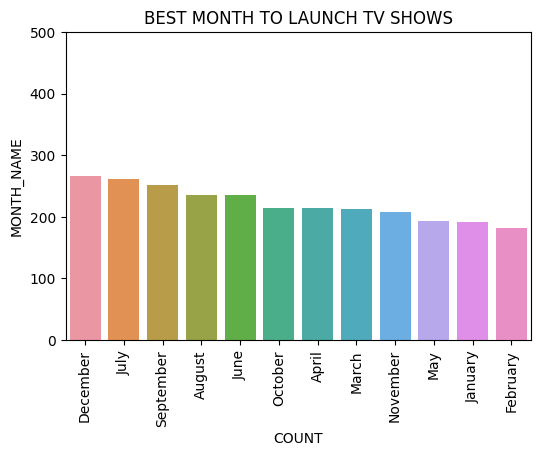

In [ ]:
show_time = stream_time["TV Show"].sort_values(ascending = False)

plt.figure(figsize = (6,4))
sns.barplot(x = show_time.index, y = show_time.values)
plt.xticks(rotation = 90)
plt.ylim(0,500)
plt.title("BEST MONTH TO LAUNCH TV SHOWS")
plt.xlabel("COUNT")
plt.ylabel("MONTH_NAME")
plt.show()

It seems like NetFlix has released most of its movies in the Month of July
and most of its TV Shows in Month of December
December and July are the months of TV shows and Movies

### **Week wise analysis**

In [ ]:
# for movies (week-wise analysis)
df["week"] = df["date_added"].dt.week

<ipython-input-28-c049dd2b9eb9>:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df["week"] = df["date_added"].dt.week


In [ ]:
str_time = df.groupby(["week","type"]).size().unstack()
str_time.reset_index().head()

type,week,Movie,TV Show
0,1.0,316,56
1,2.0,78,30
2,3.0,81,32
3,4.0,56,32
4,5.0,135,73


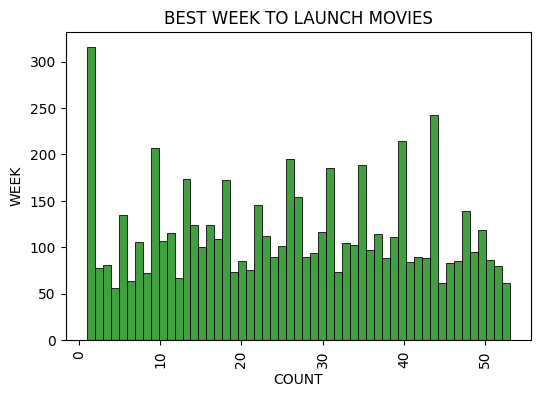

In [ ]:
plt.figure(figsize = (6,4))

sns.histplot(data = df[df["type"] == "Movie"], x = "week", bins = 53, color = "green")
plt.title("BEST WEEK TO LAUNCH MOVIES")
plt.xlabel("COUNT")
plt.ylabel("WEEK")
plt.xticks(rotation = 90)
plt.show()

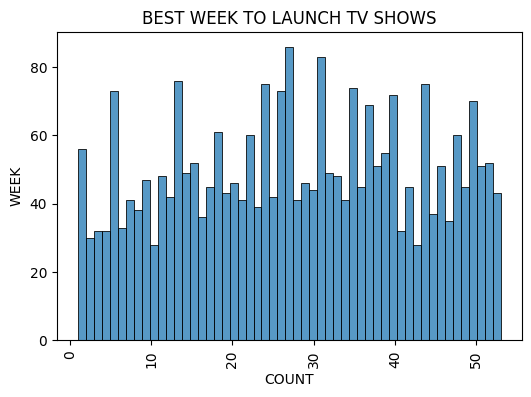

In [ ]:
show_time = stream_time["TV Show"].sort_values(ascending = False)
plt.figure(figsize = (6,4))
sns.histplot(data = df[df["type"] == "TV Show"], x = "week", bins = 53)
plt.title("BEST WEEK TO LAUNCH TV SHOWS")
plt.xlabel("COUNT")
plt.ylabel("WEEK")
plt.xticks(rotation = 90)
plt.show()

According to above data most of the movies are launched in the 1st week of the year i.e in the month of JANUARY,
and most of the TV shows are launched in the 27th week i.e around the month of JULY

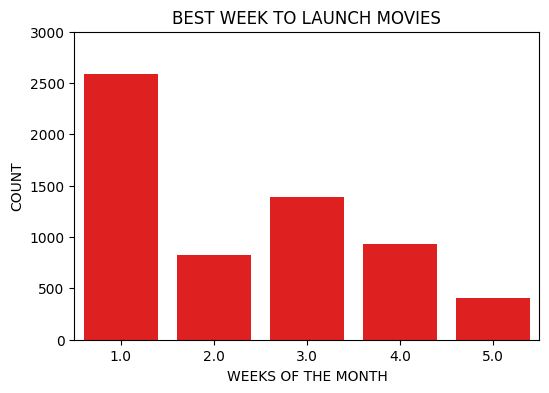

In [ ]:
#Let's analyse week of month data:
df["week_of_month"] = (df["date_added"].dt.day/7).apply(np.ceil)
a = df[df["type"] == "Movie"]
b = df[df["type"] == "TV Show"]
plt.figure(figsize = (6,4))
sns.countplot(data = a, x = "week_of_month", color = "red")
plt.title("BEST WEEK TO LAUNCH MOVIES")
plt.xlabel("WEEKS OF THE MONTH")
plt.ylabel("COUNT")
plt.ylim(0,3000)
plt.show()

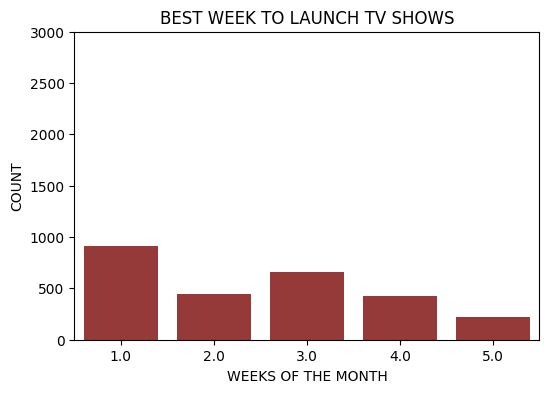

In [ ]:
plt.figure(figsize = (6,4))
sns.countplot(data = b, x = "week_of_month", color = "brown")
plt.title("BEST WEEK TO LAUNCH TV SHOWS")
plt.xlabel("WEEKS OF THE MONTH")
plt.ylabel("COUNT")
plt.ylim(0,3000)
plt.show()

If we divide each months int the bins of 4 or 5, each bin representing the weeks of the month and combine them togther, we get the following insights
most of the movies and TV shows are released either on the 1st week of every month or 3rd week of months

### **GENRE analysis**

In [ ]:
df_n  = df.copy()
df_n["listed_in"] = df_n["listed_in"].str.split(", ")
df_change = df_n.explode("listed_in")
df_change.reset_index(drop = True).head()
dff_movies = df_change[df_change["type"] == "Movie"]
dff_show = df_change[df_change["type"] == "TV Show"]

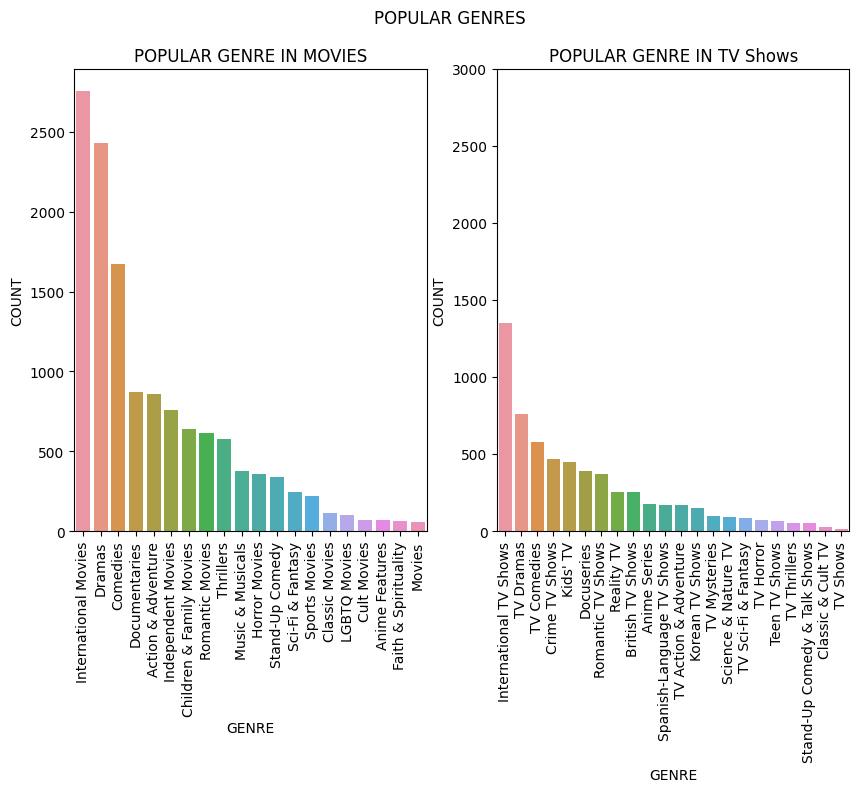

In [ ]:
# Popular genre in Movies
genre_df = pd.DataFrame(dff_movies.groupby("listed_in")["title"].nunique().sort_values(ascending = False))
genre_df = genre_df.reset_index()

plt.figure(figsize = (10,6))
plt.suptitle("POPULAR GENRES")
plt.subplot(1,2,1)
sns.barplot(data = genre_df, x = "listed_in", y = "title")
plt.title("POPULAR GENRE IN MOVIES")
plt.xlabel("GENRE")
plt.ylabel("COUNT")
plt.xticks(rotation = 90)

# Popular genre in TV shows
genre_dff = pd.DataFrame(dff_show.groupby("listed_in")["title"].nunique().sort_values(ascending = False))
genre_dff = genre_dff.reset_index()

plt.subplot(1,2,2)
sns.barplot(data = genre_dff, x = "listed_in", y = "title")
plt.title("POPULAR GENRE IN TV Shows")
plt.xlabel("GENRE")
plt.ylabel("COUNT")
plt.ylim(0,3000)
plt.xticks(rotation = 90)
plt.show()

The most popular genre among the audience is International Movies in Movies section and INternationall TV Shows in TV shows section

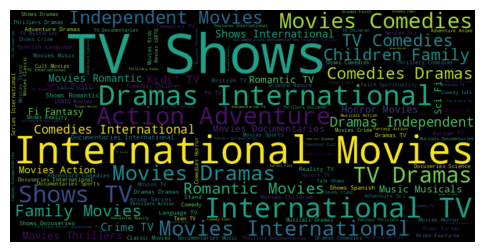

In [ ]:
# Word Cloud
text = ' '.join(i for i in df_change["listed_in"].dropna())
wordcloud = WordCloud( background_color = 'black', width = 800, height = 400).generate(text)
plt.figure(figsize = (6, 4))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

### **Analaysis on best time to add movie on Netflix**

In [ ]:
df_date_data = df
df_date_data["release_year"] = df_date_data["release_year"].astype("str")
df_date_data["release_year"] = pd.to_datetime(df_date_data["release_year"])
df_date_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_name,week,week_of_month
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020-01-01,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",September,38.0,4.0
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021-01-01,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",September,38.0,4.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021-01-01,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,September,38.0,4.0
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021-01-01,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",September,38.0,4.0
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021-01-01,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,September,38.0,4.0


In [ ]:
df_date_data["day_diff"] = df_date_data["date_added"] - df_date_data["release_year"]
df_date_data["day_diff"].value_counts()

334 days     37
639 days     35
546 days     35
364 days     30
365 days     28
             ..
3584 days     1
4682 days     1
6819 days     1
3532 days     1
5123 days     1
Name: day_diff, Length: 2712, dtype: int64

In [ ]:
# So it is better to add movie to the platform within 334 days assuming that
# release date and month is first of Jan (as release date and month is not provided)
df_date_data["day_diff"].mode()

0   334 days
Name: day_diff, dtype: timedelta64[ns]

### **How has the number of movies released per year changed over the last 20-30 years?**

In [ ]:
df["release_year"] = df["release_year"].dt.year.astype("int")

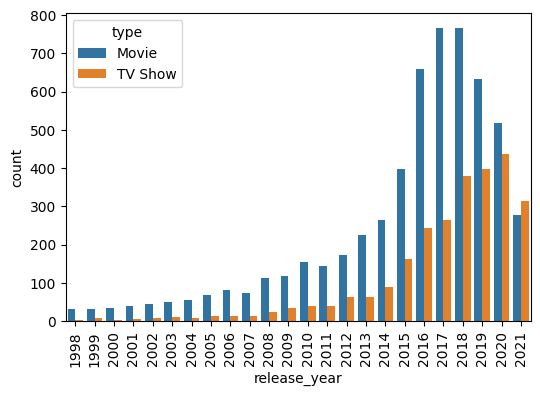

In [ ]:
r_data = df[df["release_year"] >= 1998]
plt.figure(figsize = (6,4))
sns.countplot(data = r_data, x = "release_year", hue = "type")
plt.xticks(rotation = 90)
plt.show()



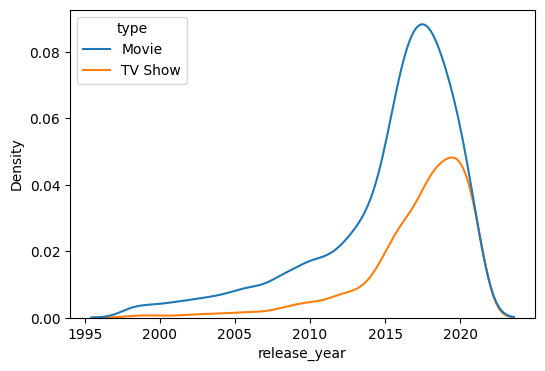

In [ ]:
plt.figure(figsize = (6,4))
sns.kdeplot(data = r_data, x = "release_year", hue = "type")
plt.show()

The trend of movies and tv shows tend to increase between 1998 to 2014 and the count of movies and TV shows are more denser between the year 2015 to 2019 and then it gradual started dropping in the count in the further years

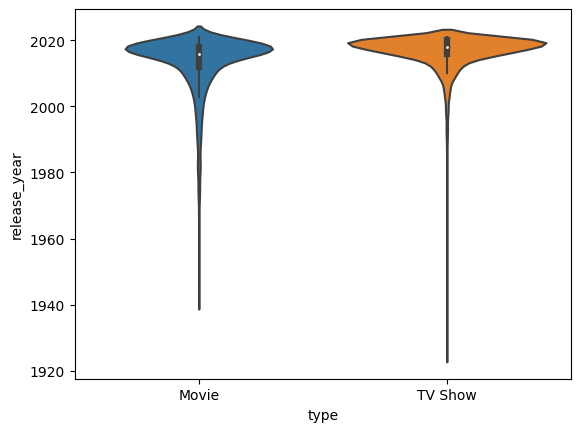

In [ ]:
sns.violinplot(data = df, x = "type", y = df["release_year"])
plt.show()

The density around the years 2015 to 2020 is more in both the cases

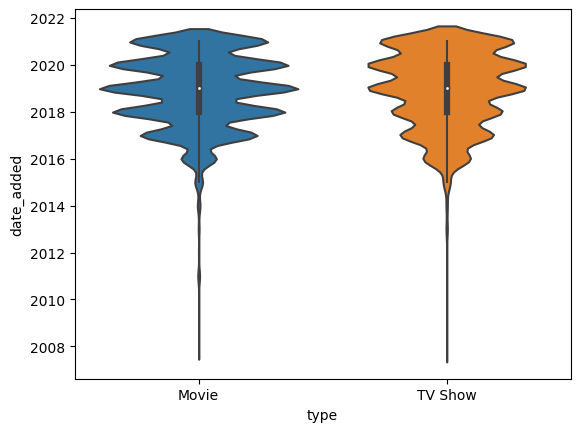

In [ ]:
sns.violinplot(data = df, x = "type", y = df["date_added"].dt.year)
plt.show()

Most of the movies were released by the Netflix during the time period of 2017 tp 2020

<Axes: xlabel='release_year', ylabel='date_added'>

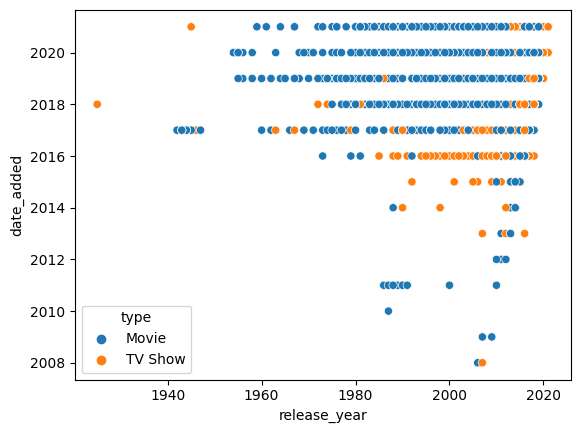

In [ ]:
sns.scatterplot(data = df, x = "release_year", y = df["date_added"].dt.year, hue = "type")

Netflix also released mid ninety tv shows as there are 3 tv shows which are before 1960s
and the blue dots are representing the boom in release of movies after 2014

### **Rating Analysis**

In [ ]:
new_data = df.dropna(subset = "rating")
new_data["rating"].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

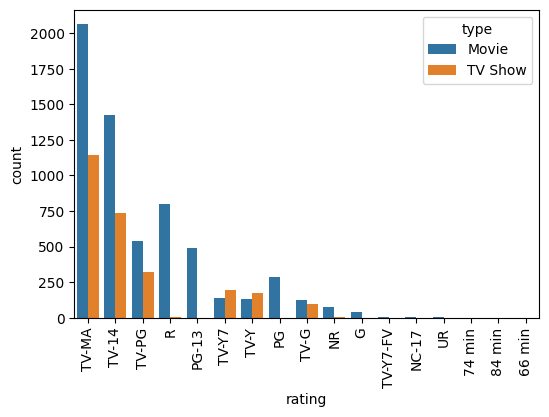

In [ ]:
plt.figure(figsize = (6,4))
sns.countplot(data = new_data, x = "rating", order = new_data["rating"].value_counts().index, hue = "type")
plt.xticks(rotation = 90)
plt.show()

TV-MA, TV-14, TV-PG, R are top ratings in both the categories

Netflix must pay attention to current trends, and the shifting of the market according to the market preference.
Like what most of the audience now prefer, TV shows or Movies !!!
and what is most prefered durational TV shows and Movies